# Técnicas

# Binning, discretização ou Agrupamento



## Discretização de variáveis contínuas por meio de quantização com bins fixos

A discretização de variáveis contínuas é o processo de converter variáveis contínuas em variáveis discretas dividindo o intervalo contínuo em partes distintas chamadas "bins". Isso pode ser feito de várias maneiras, uma das quais é utilizando bins de largura fixa.

**Exemplo em Python usando `pd.cut`:**

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
['Bin 1', 'Bin 2', 'Bin 3', 'Bin 4', 'Bin 5', 'Bin 6', 'Bin 7', 'Bin 8', 'Bin 9', 'Bin 10']
<bound method DataFrame.value_counts of          0
0    Bin 3
1    Bin 3
2   Bin 10
3    Bin 8
4    Bin 5
..     ...
95   Bin 5
96   Bin 4
97   Bin 2
98   Bin 7
99  Bin 10

[100 rows x 1 columns]>


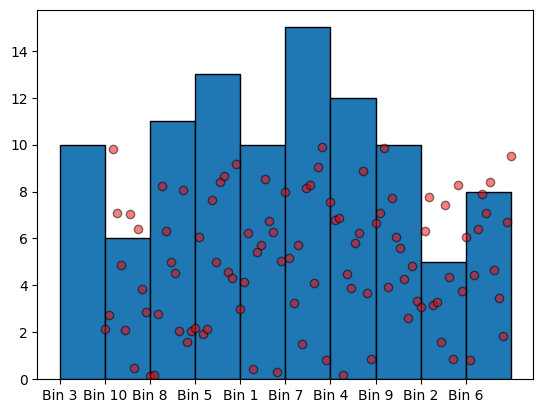

In [70]:
import numpy as np
import pandas as pd

# Dados de exemplo
dados = np.random.rand(100) * 100  # 100 valores aleatórios entre 0 e 100

# Discretização com bins de largura fixa
bins = np.linspace(0, 100, 11)  # 10 bins de largura 10
print(bins)
labels = [f'Bin {i}' for i in range(1, len(bins))]
print(labels)
dados_discretizados = pd.cut(dados, bins=bins, labels=labels)
print((pd.DataFrame(dados_discretizados)).value_counts)

# print(dados_discretizados)

import matplotlib.pyplot as plt

bins =np.linspace(0,10,11)
plt.hist(dados_discretizados, bins=bins, edgecolor='k')
plt.scatter(np.linspace(1,10,100), dados / 10, alpha=0.5, c='red', edgecolors='k')
plt.show()


**Discretização com `pd.cut`**

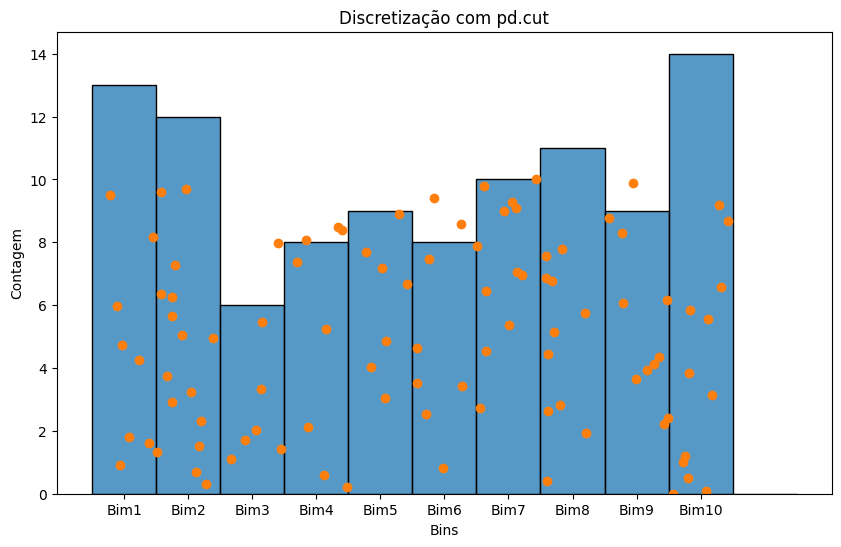

,valor,binned
0,9.073614,Bim10
1,9.580518,Bim10
2,3.980930,Bim4
3,1.779715,Bim2
4,7.107466,Bim8
...,...,...
95,1.082316,Bim1
96,1.471897,Bim2
97,6.124495,Bim7
98,8.441954,Bim9


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
# np.random.seed(0)
data = {'valor': np.random.rand(100) * 10}
df = pd.DataFrame(data)

# Discretização com bins fixos
df['binned'] = pd.cut(df['valor'], bins=10, labels=[f"Bim{i+1}" for i in range(10)])

# Gráfico
plt.figure(figsize=(10, 6))
plt.subplot(1,1,1)
sns.histplot(df['binned'], bins=10, kde=False, binrange=(0, 10))
plt.subplot(1,1,1)
plt.scatter(df['valor']-.5, np.linspace(0, 10,100))


# sns.scatterplot(df['valor'], color='red')
plt.title('Discretização com pd.cut')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

df

- **O gráfico resultante mostrará um histograma com bins de larguras variáveis, cada um contendo aproximadamente o mesmo número de amostras.**

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `pd.cut` para dividir esses valores em 10 bins de tamanho igual.
3. Visualizamos a distribuição dos dados discretizados com um histograma.

**Gráfico 2: Discretização com `np.digitize`**

[5 3 7 1 2 3 8 0 2 9 8 4 6 0 9 3 5 2 1 8 0 1 1 5 3 5 6 8 0 3 2 0 5 1 1 9 3
 9 1 0 8 3 3 5 5 2 2 2 3 6 1 7 8 5 1 2 5 3 5 9 8 7 8 6 7 2 3 7 4 7 8 1 5 3
 8 8 5 9 1 5 4 1 4 3 1 7 0 9 1 2 5 6 2 7 4 1 7 5 2 4]


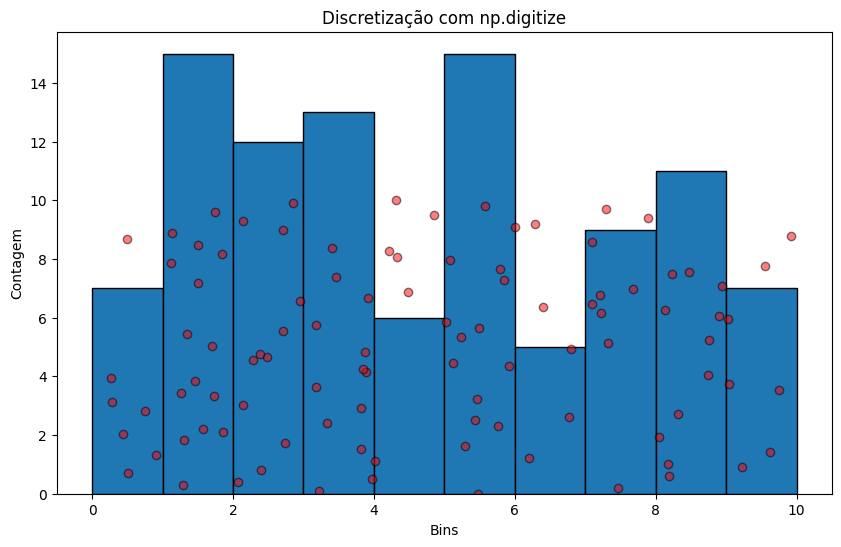

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.rand(100) * 100

# Definindo os limites dos bins
bins = np.linspace(0, 100, 11)
# Discretização com bins fixos
binned_data = np.digitize(data, bins) -1
print(binned_data)

# Gráfico
plt.figure(figsize=(10, 6))
plt.hist(binned_data, bins=10, edgecolor='black', range=(0,10))
plt.scatter(data/10, np.linspace(0,10,100), c='red', alpha=0.5, edgecolor='k')
plt.title('Discretização com np.digitize')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Definimos 11 pontos de limite para 10 bins usando `np.linspace`.
3. Usamos `np.digitize` para categorizar os dados com base nesses limites.
4. Visualizamos a distribuição dos dados discretizados com um histograma.


**Discretização com `KBinsDiscretizer`**

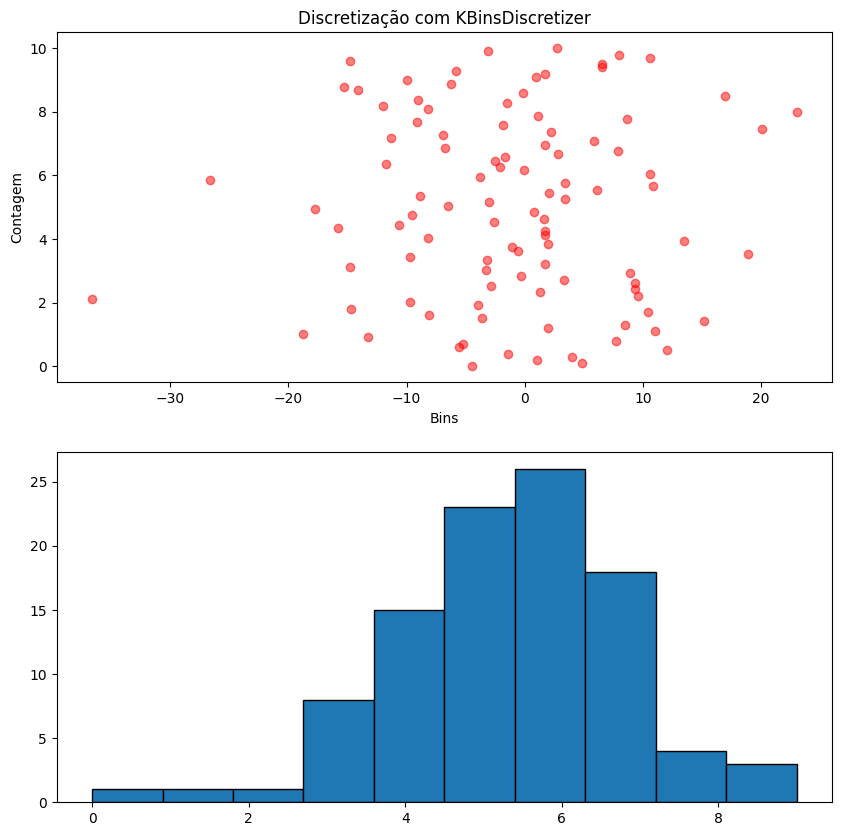

In [73]:
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.randn(100,1) * 10
# print(data)

# Aplicação do KBinsDiscretizer com estratégia 'uniform'
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_binned = est.fit_transform(data).reshape(-1)
# print(data_binned)


# Gráfico
plt.figure(figsize=(10, 10))
plt.subplot(212)
plt.hist(data_binned, bins=10, edgecolor='black')
plt.subplot(211)
plt.scatter(data, np.linspace(0,10,100), c='red', alpha=0.5)
plt.title('Discretização com KBinsDiscretizer')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

## Discretização de variáveis contínuas por meio de quantização com bins variáveis

A discretização com bins variáveis, ou "quantiles", divide os dados em intervalos de tal forma que cada bin contém aproximadamente o mesmo número de pontos de dados.

**Exemplo em Python:**

Os dados agrupados a cada 1/10 da quantidade de dados:

0      2
1      4
2      7
3      1
4      1
      ..
995    2
996    6
997    0
998    5
999    2
Name: binned, Length: 1000, dtype: int64


Os valores que delilmitam os intervalos:	 [ 44.41226148  74.01808443  81.97816845  88.47515937  94.17103762
  99.33026441 105.16431842 111.37257971 117.62767241 126.80730177
 166.12947375]


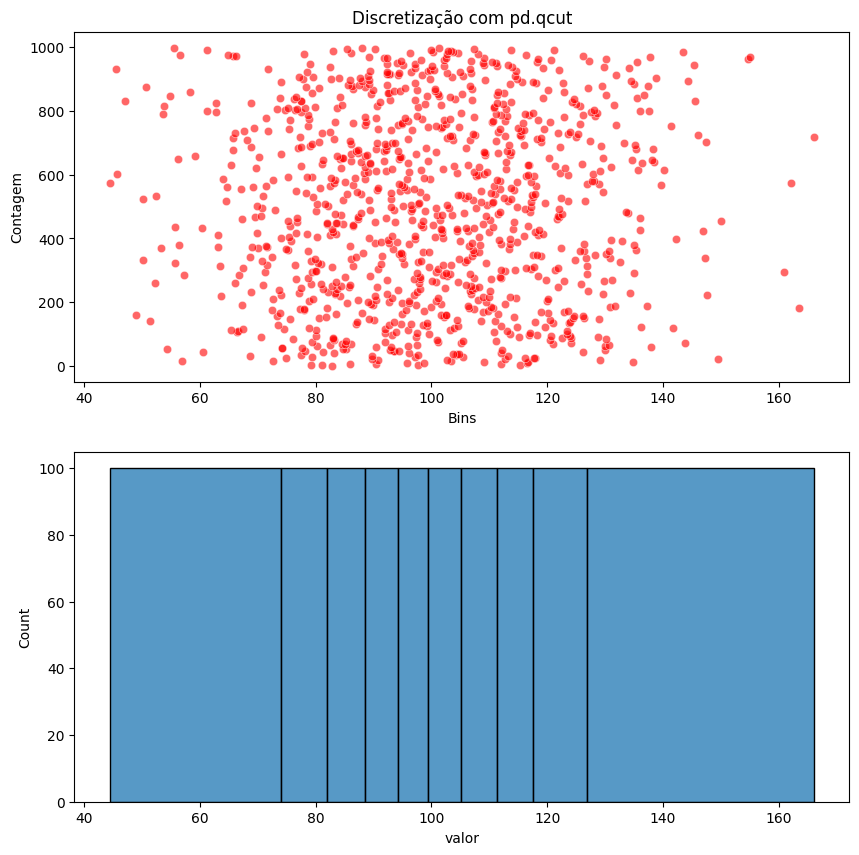

,valor,binned
0,82.776395,2
1,97.770932,4
2,115.228058,7
3,79.148575,1
4,81.169470,1
...,...,...
995,85.435906,2
996,107.441930,6
997,55.531201,0
998,101.282103,5


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {'valor': np.random.randn(1000) * 20 + 100 }
df = pd.DataFrame(data)

# Discretização com bins variáveis
df['binned'], intervalos = pd.qcut(df['valor'], q=10, labels=False, retbins=True)
print('Os dados agrupados a cada 1/10 da quantidade de dados:\n')
print(df['binned'])

print('\n\nOs valores que delilmitam os intervalos:\t', intervalos)
# Plotagem dos dados discretizados


plt.figure(figsize=(10, 10))
plt.subplot(2,1,2)
sns.histplot(df['valor'], bins=intervalos, kde=False)
plt.subplot(2,1,1)
sns.scatterplot(y = range(len(df['valor'])), x= df['valor'], c='red', alpha=0.6)
plt.title('Discretização com pd.qcut')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

df

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Usamos `pd.qcut` para dividir esses valores em 10 bins com aproximadamente o mesmo número de pontos de dados.
3. Visualizamos a distribuição dos dados discretizados com um histograma.



**Discretização com `np.percentile`**

[-41.90836532  32.56629034  55.91638129  64.34674934  75.76526766
  96.26066417 107.10329362 123.45306606 140.30549154 172.95830912
 216.15628214]


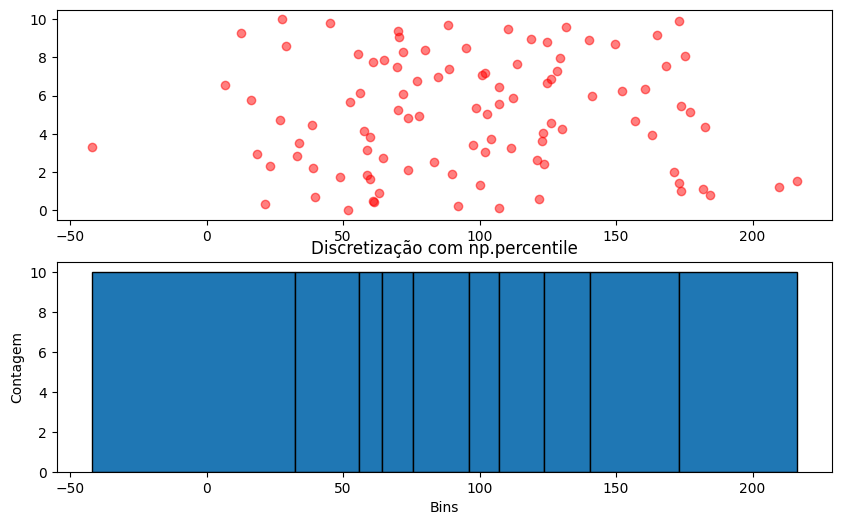

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
data = np.random.randn(100) * 50 + 100

# Definindo os percentis para os bins variáveis
percentiles = np.percentile(data, np.arange(0, 101, 10))
print(percentiles)

# Discretização com bins variáveis
# binned_data = np.digitize(data, percentiles)
# print(binned_data)

# Gráfico
plt.figure(figsize=(10, 6))
plt.subplot(211)
plt.scatter(data, np.linspace(0,10,100), c= 'red', alpha = 0.5)
plt.subplot(212)
plt.hist(data, bins=percentiles, edgecolor='black')
plt.title('Discretização com np.percentile')
plt.xlabel('Bins')
plt.ylabel('Contagem')
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Calculamos os percentis para dividir os dados em 10 bins.
3. Usamos `np.digitize` para categorizar os dados com base nesses percentis.
4. Visualizamos a distribuição dos dados discretizados com um histograma.



#### **Comparação entre `pd.cut` e `pd.qcut`**

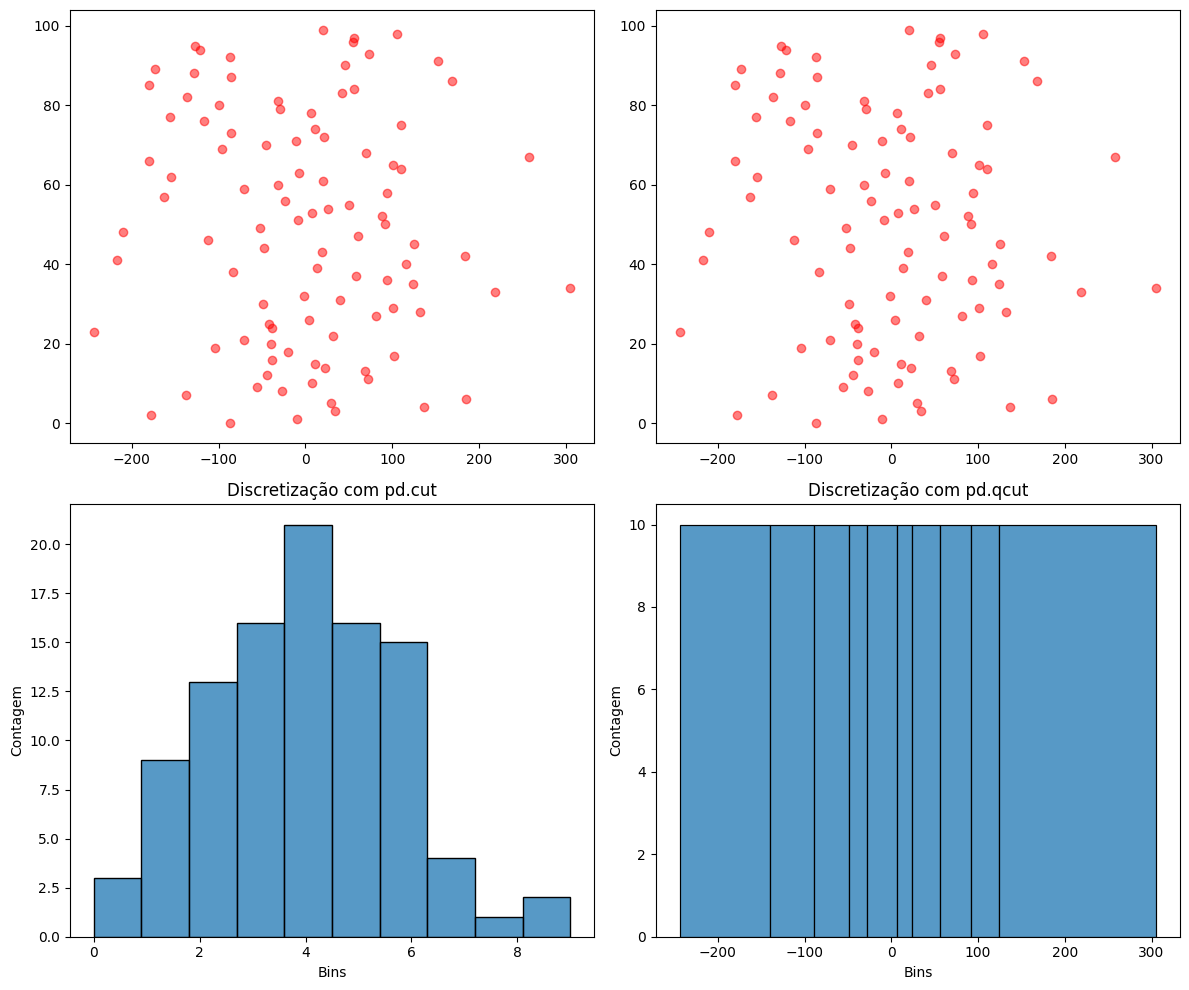

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de exemplo
data = {'valor': np.random.randn(100) * 100}
df = pd.DataFrame(data)

# Discretização com bins fixos usando pd.cut
df['binned_cut'] = pd.cut(df['valor'], bins=10, labels=False)

# Discretização com bins variáveis usando pd.qcut
df['binned_qcut'], edges = pd.qcut(df['valor'], q=10, labels=False, retbins=True)

# Gráficos
plt.figure(figsize=(12, 10))

plt.subplot(2,2,1)
plt.scatter(df['valor'], range(len(df['valor'])),c='red', alpha = 0.5)

plt.subplot(222)
plt.scatter(df['valor'], range(len(df['valor'])),c='red', alpha = 0.5)

plt.subplot(2, 2, 3)
sns.histplot(df['binned_cut'], bins=10, kde=False)
plt.title('Discretização com pd.cut')
plt.xlabel('Bins')
plt.ylabel('Contagem')

plt.subplot(2, 2, 4)
sns.histplot(df['valor'], bins=edges, kde=False)
plt.title('Discretização com pd.qcut')
plt.xlabel('Bins')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

**Explicação**:
1. Geramos 100 valores aleatórios entre 0 e 100.
2. Discretizamos os dados em 10 bins de tamanho igual usando `pd.cut` e em 10 bins com aproximadamente o mesmo número de pontos de dados usando `pd.qcut`.
3. Comparamos a distribuição dos dados discretizados com histogramas lado a lado.


# FunctionTransform

## Utilizar a FunctionTransformer do sklearn em uma variável

A `FunctionTransformer` permite aplicar qualquer função de transformação aos dados, aplicando uma função customizada. 

Pode ser útil para aplicar transformações que não estão diretamente disponíveis nas outras classes de transformação do scikit-learn.

**Exemplo em Python:**

#### Função do numpy de elevar ao quadrado `np.square`

[[  0   1]
 [  4   9]
 [ 16  25]
 [ 36  49]
 [ 64  81]
 [100 121]
 [144 169]
 [196 225]]


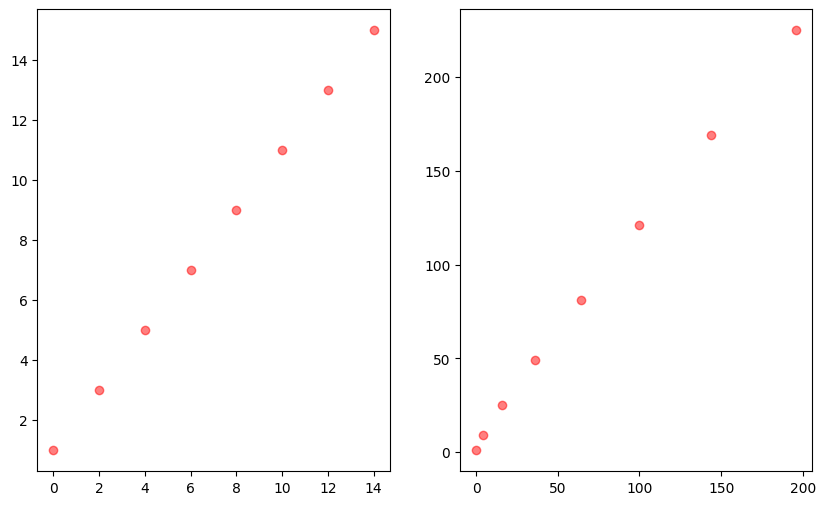

In [77]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14,15]])

# Função customizada: quadrado dos valores
transformer = FunctionTransformer(np.square)
dados_transformados = transformer.transform(dados)

print(dados_transformados)


# Exibir os dados transformados
plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()


#### A.5.1. Transformações Logarítmicas
Transformações logarítmicas podem ajudar a lidar com distribuições altamente assimétricas e reduzir a variabilidade dos dados.

Comprime o intervalo de números grandes e expande o intervalo de números pequenos.

[[0.         0.69314718]
 [1.09861229 1.38629436]
 [1.60943791 1.79175947]
 [1.94591015 2.07944154]
 [2.19722458 2.30258509]
 [2.39789527 2.48490665]
 [2.56494936 2.63905733]
 [2.7080502  2.77258872]]


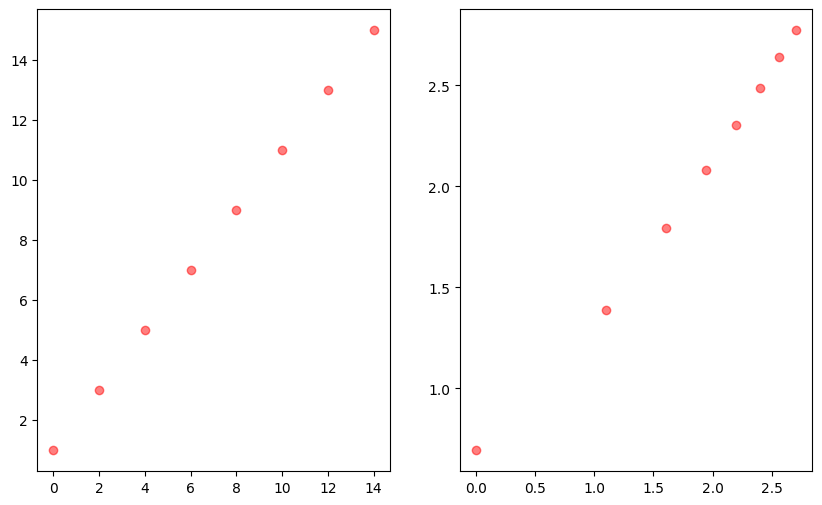

In [78]:
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14,15]])

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados)

# Exibir os dados transformados
print(dados_transformados)

plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()

[[ 0.          1.09861229]
 [ 1.09861229  2.19722458]
 [ 1.60943791  3.49650756]
 [ 1.94591015  4.8598124 ]
 [ 2.19722458  6.24027585]
 [ 2.39789527  7.62510715]
 [ 2.56494936  9.01103541]
 [ 2.7080502  10.39723823]]


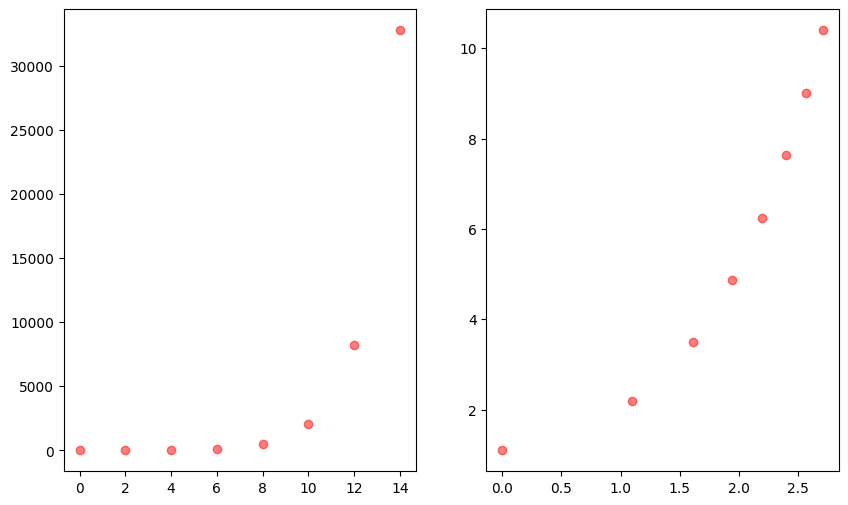

In [79]:
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[0, 2**1], [2, 2**3], [4, 2**5], [6, 2**7], [8, 2**9], [10, 2**11], [12, 2**13], [14,2**15]])

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados)

# Exibir os dados transformados
print(dados_transformados)

plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()

[[ 0.          1.09861229]
 [ 1.09861229  2.19722458]
 [ 1.60943791  3.49650756]
 [ 1.94591015  4.8598124 ]
 [ 2.19722458  6.24027585]
 [ 2.39789527  7.62510715]
 [ 2.56494936  9.01103541]
 [ 2.7080502  10.39723823]]


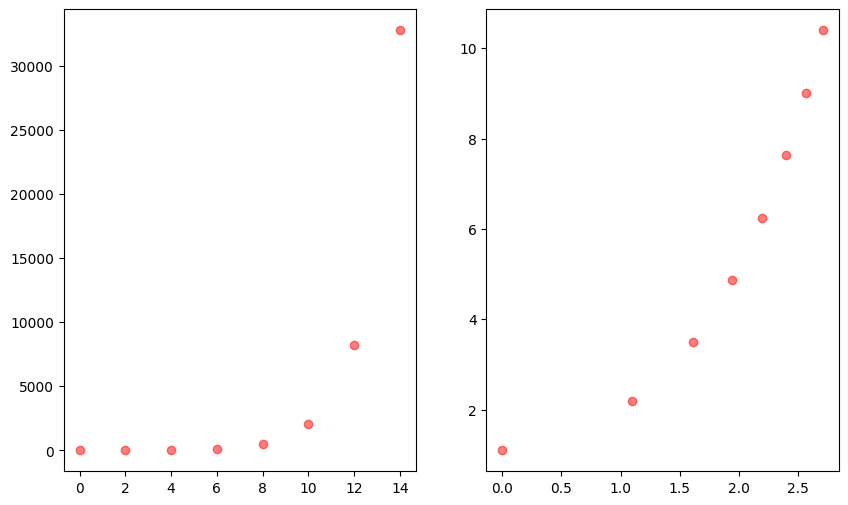

In [80]:
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
dados = np.array([[0, 2**1], [2, 2**3], [4, 2**5], [6, 2**7], [8, 2**9], [10, 2**11], [12, 2**13], [14,2**15]])

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados)

# Exibir os dados transformados
print(dados_transformados)

plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()

[[1.00000000e+00 1.22060823e+00]
 [2.00000000e+00 1.68456718e+00]
 [3.00000000e+00 1.94571891e+00]
 [4.00000000e+00 1.78428084e+00]
 [5.00000000e+00 1.17058896e+00]
 [6.00000000e+00 2.10379178e+00]
 [7.00000000e+00 2.77966498e+00]
 [8.00000000e+00 2.20398933e+00]
 [9.00000000e+00 2.08691791e+00]
 [1.00000000e+01 3.30769978e+00]
 [1.10000000e+01 3.30343083e+00]
 [1.20000000e+01 2.73860531e+00]
 [1.30000000e+01 3.47991585e+00]
 [1.40000000e+01 2.43428454e+00]
 [1.50000000e+01 5.14603895e+00]
 [1.60000000e+01 6.42342191e+00]
 [1.70000000e+01 7.26284336e+00]
 [1.80000000e+01 3.42676525e+00]
 [1.90000000e+01 4.60297712e+00]
 [2.00000000e+01 5.16947547e+00]
 [2.10000000e+01 1.03748292e+01]
 [2.20000000e+01 1.15971444e+01]
 [2.30000000e+01 1.11991199e+01]
 [2.40000000e+01 6.80128002e+00]
 [2.50000000e+01 1.16344391e+01]
 [2.60000000e+01 1.05497012e+01]
 [2.70000000e+01 1.75781492e+01]
 [2.80000000e+01 1.84890722e+01]
 [2.90000000e+01 1.72340869e+01]
 [3.00000000e+01 1.41575342e+01]
 [3.100000

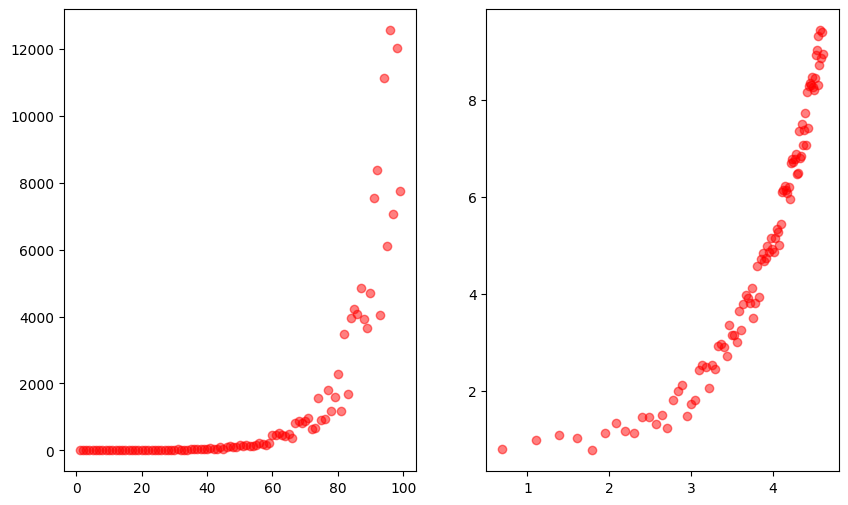

In [81]:
from sklearn.preprocessing import FunctionTransformer

# Dados de exemplo
# dados = np.random.exponential(scale = 2, size=1000).reshape(-1,1)

dados = np.array([[i,(1.1**i)+ (np.random.rand()-.5)*(-1.1**i)] for i in range(1,100)])
print(dados)

# Função de transformação: logaritmo natural
transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados)

# Exibir os dados transformados
print(dados_transformados)

plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()

      feature  log_feature
0        0.01     0.009950
1        0.10     0.095310
2        1.00     0.693147
3       10.00     2.397895
4      100.00     4.615121
5     1000.00     6.908755
6    10000.00     9.210440
7   100000.00    11.512935
8  1000000.00    13.815512


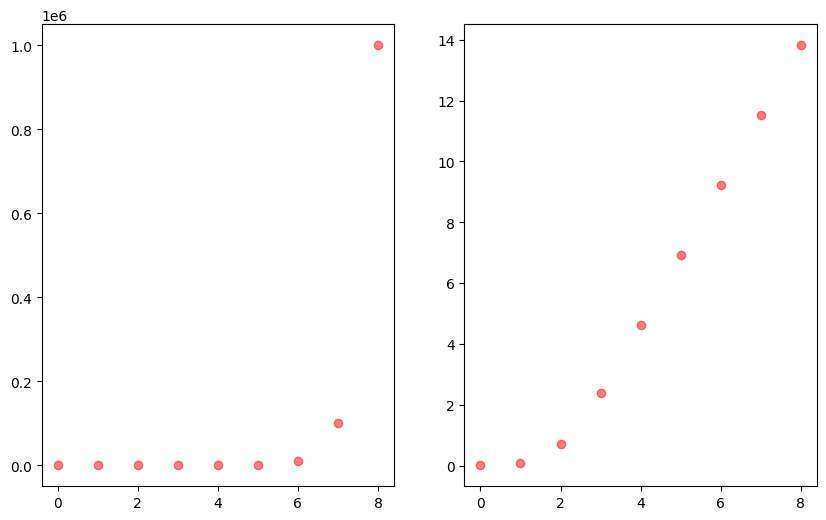

In [82]:
import numpy as np
import pandas as pd

# Exemplo de dados com distribuição assimétrica
data = pd.DataFrame({'feature': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]})

# Aplicar transformação logarítmica
data['log_feature'] = np.log1p(data['feature'])

print(data)


# Exibir os dados transformados
plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(range(len(data)), data['feature'], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(range(len(data)), data['log_feature'], c='red', alpha=0.5)


plt.show()

#### Transformações de Raiz Quadrada
A transformação de raiz quadrada pode estabilizar variâncias em conjuntos de dados com distribuições assimétricas.

In [83]:
import numpy as np
import pandas as pd

# Exemplo de dados
data = pd.DataFrame({'feature': [1, 10, 100, 1000, 10000]})

# Aplicar transformação de raiz quadrada
data['sqrt_feature'] = np.sqrt(data['feature'])

print(data)

   feature  sqrt_feature
0        1      1.000000
1       10      3.162278
2      100     10.000000
3     1000     31.622777
4    10000    100.000000


### Usando para aplicar sua própria transformação

[[ 0  3]
 [ 9 11]
 [ 2  1]
 [ 1  8]
 [ 2  2]
 [ 1  5]
 [ 7  0]
 [ 3  9]]


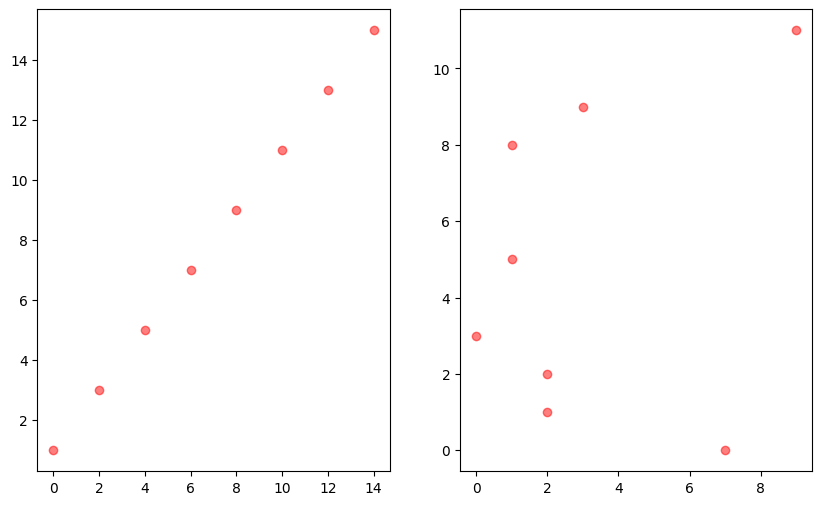

In [84]:
from numpy import log1p
from sklearn.preprocessing import FunctionTransformer


def equacao(x):
    return (x**2+5*x-3)*x%13
    # return log1p(x)

dados = np.array([[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14,15]])


transformer = FunctionTransformer(equacao)
dados_transformados = transformer.transform(dados)

print(dados_transformados)


# Exibir os dados transformados
plt.figure(figsize= (10,6) )
plt.subplot(121)
plt.scatter(dados[:,0], dados[:,1], c='red', alpha=0.5)
plt.subplot(122)
plt.scatter(dados_transformados[:,0], dados_transformados[:,1], c='red', alpha=0.5)


plt.show()

# powerTransform

### Utilizar a PowerTransformer do sklearn em uma variável

A `PowerTransformer` aplica uma transformação de potência (Box-Cox ou Yeo-Johnson) para estabilizar a variância e tornar os dados mais gaussianos.

**Exemplo em Python:**

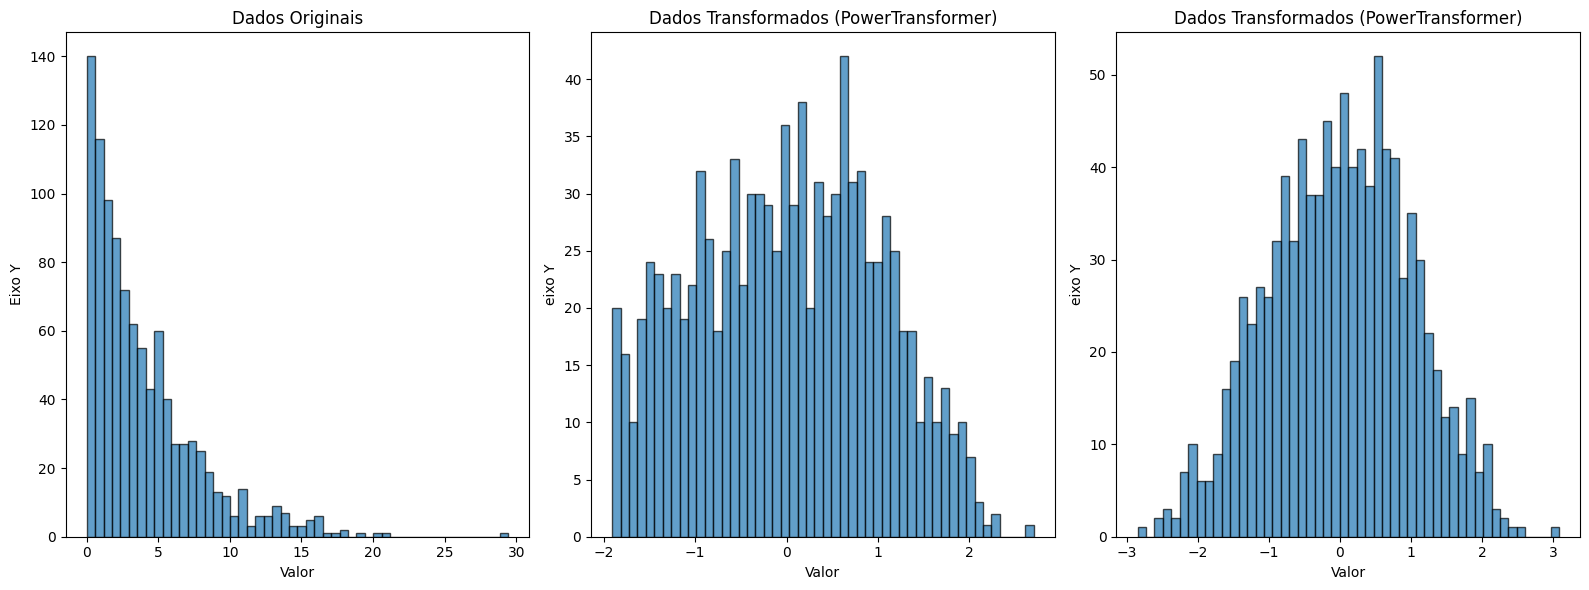

[[-1.35356101e+00]
 [ 2.02077265e-01]
 [ 7.42694099e-01]
 [ 1.34645672e-01]
 [-5.93842568e-01]
 [ 7.20225424e-02]
 [ 1.63072158e+00]
 [-6.08376531e-01]
 [-1.60191322e+00]
 [-1.92907513e-01]
 [-1.08824674e+00]
 [ 9.79035068e-01]
 [ 1.68625459e-01]
 [-2.88330311e-01]
 [-1.50762782e-01]
 [-1.05821806e+00]
 [ 7.70348790e-01]
 [-1.40845181e+00]
 [-1.84390086e+00]
 [ 1.26489801e+00]
 [-4.52155521e-01]
 [-3.81335425e-01]
 [ 3.36118882e-01]
 [ 1.09783791e+00]
 [ 1.69552622e+00]
 [ 7.64221790e-01]
 [-2.06851063e-01]
 [-1.80931285e+00]
 [-1.20249123e+00]
 [-1.19315190e+00]
 [ 6.98776952e-01]
 [ 1.74773054e+00]
 [-1.90955837e+00]
 [ 3.56454409e-01]
 [-1.39928578e+00]
 [ 8.13438460e-01]
 [-1.68481692e+00]
 [-3.79211392e-02]
 [-1.08026738e+00]
 [ 1.05184926e+00]
 [ 9.39346135e-01]
 [ 2.03081035e+00]
 [-1.18898260e+00]
 [ 5.45838326e-03]
 [-1.36781562e-01]
 [ 1.90491760e-01]
 [-1.23481913e+00]
 [ 1.23419970e+00]
 [-1.07505347e+00]
 [-8.58457688e-01]
 [-1.53936417e+00]
 [-7.47018283e-01]
 [ 6.1977243

In [85]:
import numpy as np
from sklearn.preprocessing import PowerTransformer

# Dados de exemplo
dados = np.random.rand(1000, 1) * 100  # 100 valores aleatórios entre 0 e 100
dados = np.random.exponential(scale=4, size=1000).reshape(-1,1)


# Aplicar PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
dados_transformados = pt.fit_transform(dados)

pt = PowerTransformer(method='box-cox')
dados_transformados_box = pt.fit_transform(dados)

# Plotagem dos dados originais e transformados
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
# plt.scatter(np.linspace(0,100,100), dados, edgecolor='k', alpha=0.7)
plt.hist(dados, bins=50, edgecolor='k', alpha=0.7)
plt.title('Dados Originais')
plt.xlabel('Valor')
plt.ylabel('Eixo Y')

plt.subplot(1, 3, 2)
# plt.scatter(np.linspace(0,100,100), dados_transformados, edgecolor='k', alpha=0.7)
plt.hist(dados_transformados, bins=50, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (PowerTransformer)')
plt.xlabel('Valor')
plt.ylabel('eixo Y')

plt.subplot(1, 3, 3)
# plt.scatter(np.linspace(0,100,100), dados_transformados, edgecolor='k', alpha=0.7)
plt.hist(dados_transformados_box, bins=50, edgecolor='k', alpha=0.7)
plt.title('Dados Transformados (PowerTransformer)')
plt.xlabel('Valor')
plt.ylabel('eixo Y')
plt.tight_layout()
plt.show()



print(dados_transformados)

## Ajuste de escala

- Ajustar a escala dos dados é importante para garantir que todas as features contribuam de maneira equilibrada para o modelo.




## Normalização Min-Max do sklearn para garantir que os dados estão na mesma faixa-dinâmica

A normalização Min-Max escala os dados para que estejam dentro de um intervalo especificado, geralmente [0, 1].

O escalonamento de características é uma etapa fundamental no pré-processamento de dados para muitos algoritmos de aprendizado de máquina. 

Ele ajuda a padronizar o intervalo dos dados para que diferentes características contribuam de maneira justa para a modelagem. As duas técnicas populares são:


- **Normalização: (Min_Max)**
  -  Ajusta os valores para que fiquem dentro de um determinado intervalo.
  - Exemplo: Normalizar o salário para um intervalo de 0 a 1.

| ID | Salário | Salário Normalizado |
|----|---------|---------------------|
| 1  | 5000    | 0.33                |
| 2  | 6000    | 0.67                |
| 3  | 7000    | 1.00                |
| 4  | 4500    | 0.22                |
| 5  | 5500    | 0.44                |

- **Padronização ( Std - considerando o desvio padrão):** 
  - Ajusta os valores para que tenham média zero e desvio padrão um.
  - Exemplo: Padronizar a idade dos funcionários.

| ID | Idade | Idade Padronizada |
|----|-------|-------------------|
| 1  | 29    | -0.66             |
| 2  | 34    | 0.33              |
| 3  | 45    | 2.33              |
| 4  | 28    | -0.88             |
| 5  | 32    | -0.11             |



---


**MinMax Scaling:**
- Transforma os dados para que os valores fiquem em um intervalo definido, geralmente entre 0 e 1.
- Fórmula: $$  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$ 

**Exemplo em Python:**

In [86]:
from sklearn import preprocessing
import numpy as np

# Dados de exemplo
X_train = np.array([[1., -1., 2.],
                    [2., 0., 0.],
                    [0., 1., -1.]])

# Aplicar Min-Max Scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

print(X_train_minmax)

[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


#### Aplicando Min-Max Scaling

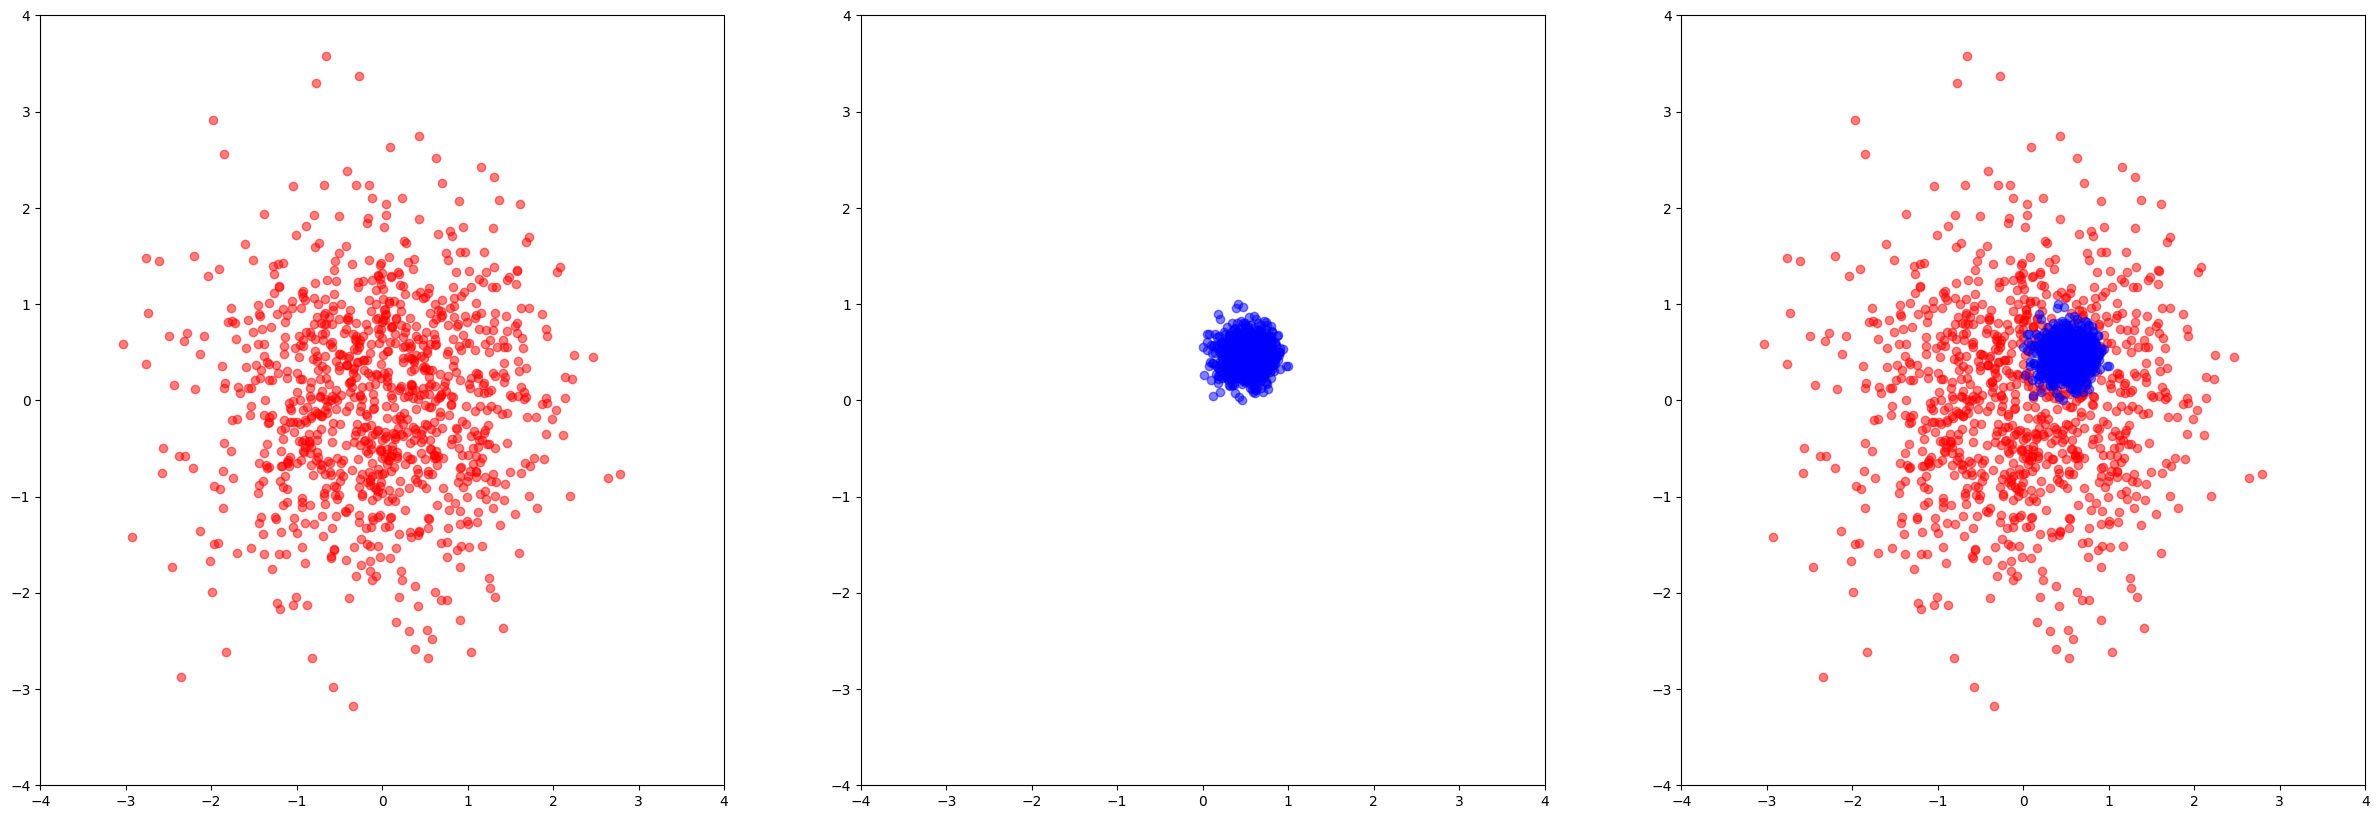

In [87]:
from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo
# dados = np.array([[1, 2], [2, 3], [4, 5]])
# dados = 10 * np.random.random_sample((1000, 2)) - 5
dados = np.random.randn(1000, 2)
# print(dados)

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados)

# Exibir os dados normalizados
# print(dados_normalizados)

plt.figure(figsize=(30,10))

plt.subplot(1, 3, 1)
plt.axis([-4,4,-4,4])
plt.scatter(dados[:, 0], dados[:, 1], c='red', alpha=0.5)

plt.subplot(1, 3, 2)
plt.axis([-4,4,-4,4])
plt.scatter(dados_normalizados[:, 0], dados_normalizados[:, 1],c='blue', alpha=0.5)
plt.subplot(1, 3, 3)
plt.axis([-4,4,-4,4])
plt.scatter(dados[:, 0], dados[:, 1], c='red', alpha=0.5)
# plt.subplot(1, 2, 2)
plt.scatter(dados_normalizados[:, 0], dados_normalizados[:, 1], c='blue', alpha=0.5)

plt.show()

#### MinMax com escala personoalizada

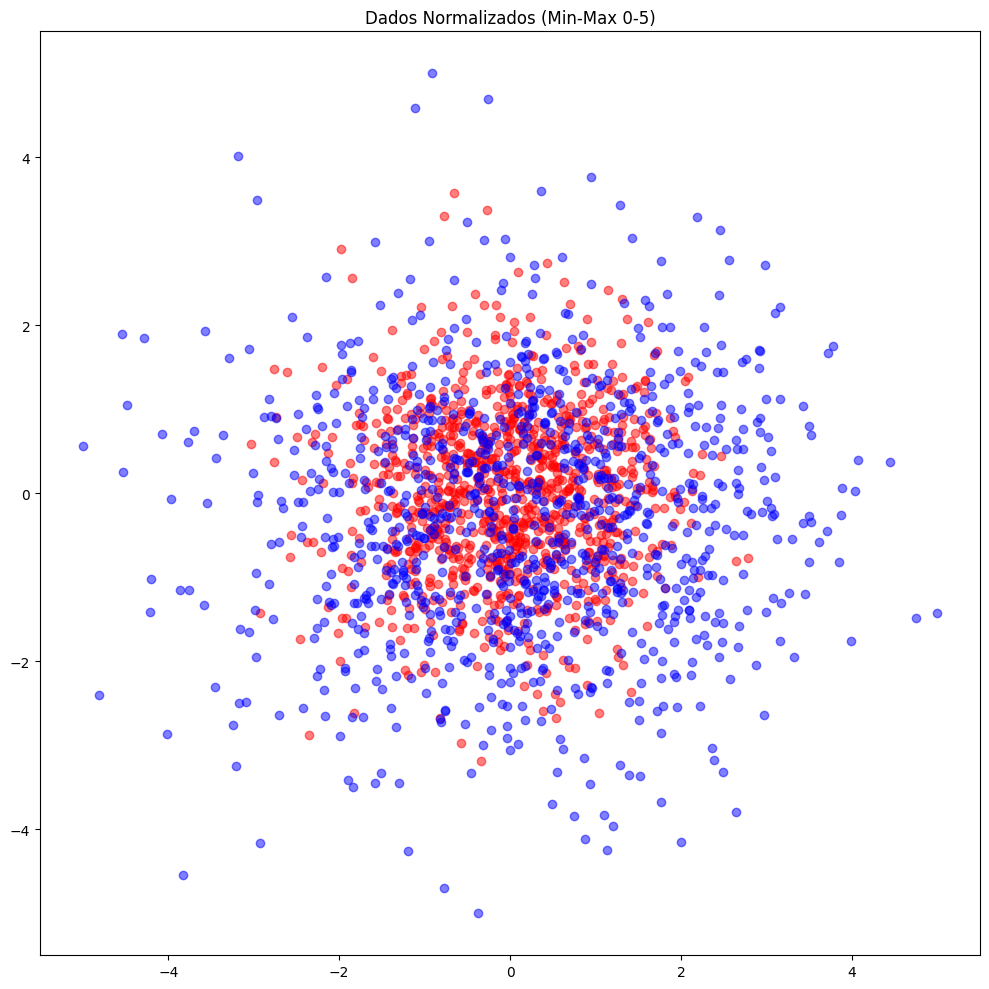

In [88]:
# Aplicação do Min-Max Scaler com faixa personalizada

scaler = MinMaxScaler(feature_range=(-5, 5))
data_normalized = scaler.fit_transform(dados)

# Gráfico
plt.figure(figsize=(10, 10))


plt.scatter(dados[:, 0], dados[:, 1], c='red', alpha=0.5)
plt.title('Dados Originais')

plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c='blue', alpha=0.5)
plt.title('Dados Normalizados (Min-Max 0-5)')

plt.tight_layout()
plt.show()

### A.8 Utilizar a normalização Standard Scaler

A normalização `StandardScaler` padroniza os dados removendo a média e escala dos dados de modo que passem a ter uma média igual a 0 e desvio padrão igual a 1.

**Standard (Z) Scaling:**

- Fórmula: $$  X_{\text{scaled}} = \frac{X - \text{mean}(X)}{\text{std}(X)} $$ 
- **Usado quando a distribuição dos dados é normal ou próxima da normal.**



In [89]:
from sklearn.preprocessing import StandardScaler

# Dados de exemplo
dados = np.array([[1,1],[2, 2], [3,3], [4,4], [5,5], [6,6]])


# Aplicar StandardScaler
scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(dados)

# Exibir os dados normalizados
print(dados_normalizados)


[[-1.46385011 -1.46385011]
 [-0.87831007 -0.87831007]
 [-0.29277002 -0.29277002]
 [ 0.29277002  0.29277002]
 [ 0.87831007  0.87831007]
 [ 1.46385011  1.46385011]]


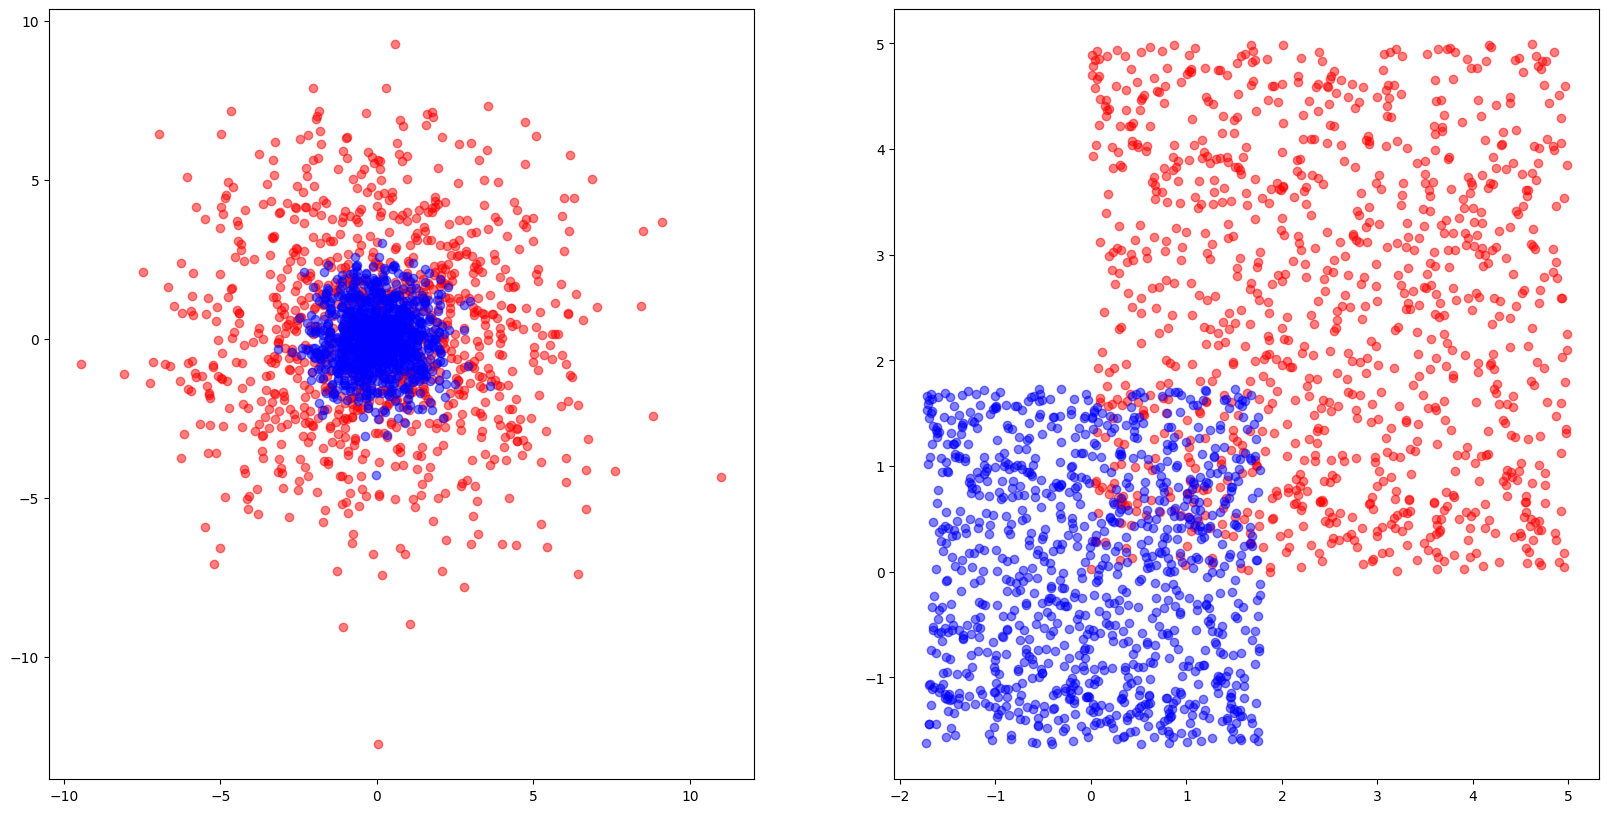

In [90]:
from sklearn.preprocessing import StandardScaler
dados = np.random.randn(1000, 2) * 5
# print(dados)

# Aplicar StandardScaler
scaler = StandardScaler()
dados = np.random.randn(1000, 2) * 3
gaussinos_normalizados = scaler.fit_transform(dados)

# Exibir os dados normalizados
# print(gaussinos_normalizados)

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.scatter(dados[:, 0], dados[:, 1], c='red', alpha=0.5)
plt.scatter(gaussinos_normalizados[:, 0], gaussinos_normalizados[:, 1], c='blue', alpha=0.5)

dados = np.random.rand(1000, 2) * 5
aleatorio_normalizados = scaler.fit_transform(dados)

plt.subplot(1, 2, 2)
plt.scatter(dados[:, 0], dados[:, 1], c='red', alpha=0.5)
plt.scatter(aleatorio_normalizados[:, 0], aleatorio_normalizados[:, 1], c='blue', alpha=0.5)
plt.show()

In [91]:
from sklearn import preprocessing
import numpy as np

# Dados de exemplo
X = np.array([[1., -1., 2.],
              [2., 0., 0.],
              [0., 1., -1.]])

# Aplicar a padronização
X_scaled = preprocessing.scale(X)

print(X_scaled)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


### Norma L2

### Utilizar a regularização norma-l2

A regularização L2 adiciona uma penalidade igual ao quadrado da magnitude dos coeficientes do modelo linear para evitar overfitting. 

Em termos de manipulação de dados, isso não afeta diretamente a transformação dos dados, mas sim o processo de ajuste do modelo.

![alt text](0_Rw_bC-1ByKfHvELn.webp)

$$ l1, Lasso: soma dos quadrados dos resíduos + penalidade * | inclinação | $$

![alt text](0_Zy-M3ejNdZxpeIv6.webp)

$$ l2, Ridge: soma dos quadrados dos resíduos + penalidade * (inclinação)² $$

![alt text](0_Sxd9ERNyv-yrKGvd.webp)

![alt text](0_Wlq4yf-bvJWSy7Oo.webp)

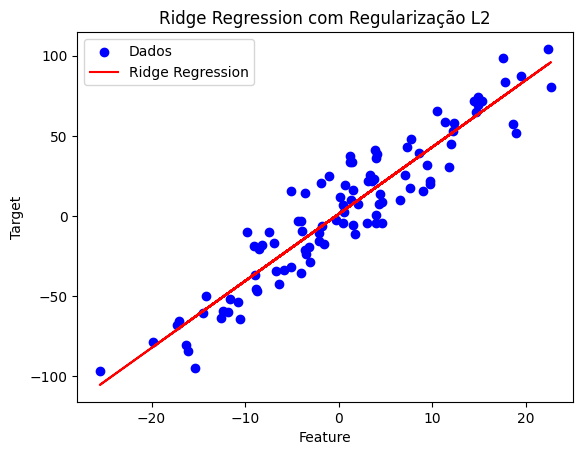

In [92]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
np.random.seed(0)
X = np.random.randn(100, 1) * 10
y = 4 * X.squeeze() + np.random.randn(100) * 15

# Aplicar Ridge Regression com regularização L2
model = Ridge(alpha=1.0)
model.fit(X, y)

# Plotagem dos dados e da linha de regressão
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, model.predict(X), color='red', label='Ridge Regression')
plt.title('Ridge Regression com Regularização L2')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

**Comparação entre Ridge e Linear Regression**

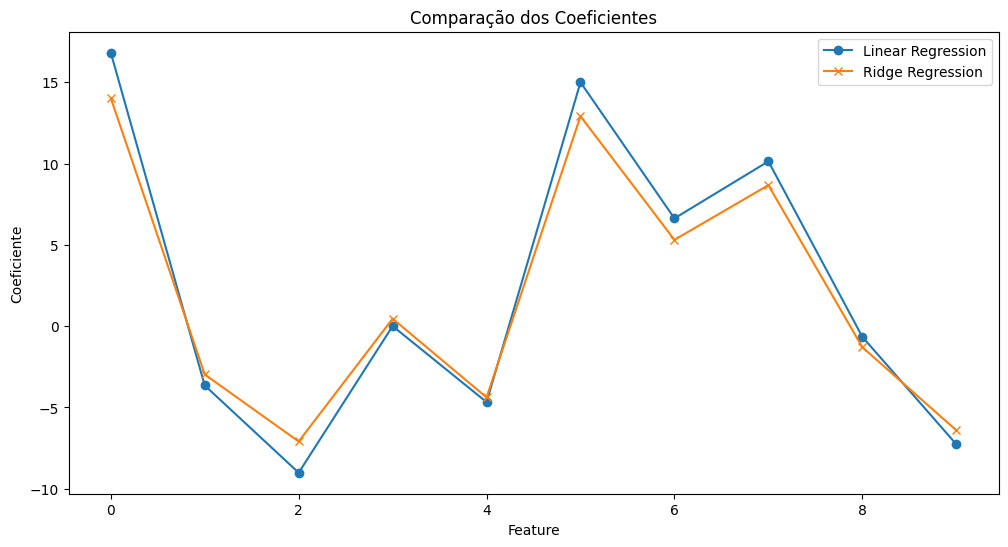

In [93]:
from sklearn.linear_model import Ridge, LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Dados de exemplo
X = np.random.rand(100, 10)
y = np.random.randn(100) * 20

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicação da Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Aplicação da Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)

# Gráfico
coef_lr = model_lr.coef_
coef_ridge = model_ridge.coef_

plt.figure(figsize=(12, 6))
# plt.scatter(X,y,c='red', alpha=0.5)
plt.plot(coef_lr, label='Linear Regression', marker='o')
plt.plot(coef_ridge, label='Ridge Regression', marker='x')
plt.title('Comparação dos Coeficientes')
plt.xlabel('Feature')
plt.ylabel('Coeficiente')
plt.legend()
plt.show()


**Exemplo usando `Ridge` do sklearn:**

In [94]:
from sklearn.linear_model import Ridge

# Dados de exemplo (X: features, y: target)
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3

# Aplicar Ridge Regression com regularização L2
model = Ridge(alpha=1.0)
model.fit(X, y)

# Coeficientes do modelo
print(model.coef_)

[0.8 1.4]


In [95]:
import numpy as np
from sklearn.linear_model import Ridge

# Dados de exemplo
X = np.random.rand(100, 2)  # 100 exemplos, 2 features
y = np.random.rand(100)  # 100 valores alvo

# Aplicar Ridge Regression com regularização L2
modelo = Ridge(alpha=1.0)
modelo.fit(X, y)

print(modelo.coef_)

[ 0.09446044 -0.01237592]


In [96]:
from sklearn.linear_model import Ridge

# Dados
X = df[['Valor']]
y = df['Valor_Quadrado']

# Modelo com regularização L2
model = Ridge(alpha=1.0)  # alpha é o parâmetro de regularização
model.fit(X, y)

# Coeficientes
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)

KeyError: "None of [Index(['Valor'], dtype='object')] are in the [columns]"

**Resultado:**

Coeficientes: [coeficiente]
Intercepto: [intercepto]

## Seleção de Features

## A.10. Selecionar as features úteis para o modelo usando uma das três técnicas: Filtragem, Wrapper e Embedding

A seleção de características é um passo crítico no pré-processamento de dados para aprendizado de máquina. Reduz a complexidade do modelo, diminui o tempo de treinamento e pode melhorar o desempenho do modelo ao eliminar características irrelevantes ou redundantes. Existem três abordagens principais para a seleção de características: Filtragem, Métodos Wrapper e Métodos Embutidos.



**Definição:**
- **Filtragem:** Seleciona features com base em testes estatísticos independentes do modelo.
- **Wrapper:** Seleciona features treinando o modelo múltiplas vezes com diferentes subconjuntos de features.
- **Embedding:** Seleciona features como parte do processo de treinamento do modelo, como nos modelos baseados em árvores.



###  Filtragem
A abordagem da filtragem envolve a avaliação de cada característica individualmente em relação à variável de resposta e a seleção das características mais relevantes. 

Métodos comuns incluem:
- **Correlação:** Mede a relação linear entre a característica e a variável de resposta. Características com alta correlação positiva ou negativa podem ser selecionadas.
- **Informação Mútua:** Mede a dependência mútua entre a característica e a variável de resposta. Características com alta informação mútua são preferidas

1. **Filtragem**: Seleção de features baseada em métodos estatísticos. 
   
- Exemplo com `SelectKBest`:


(100, 5)


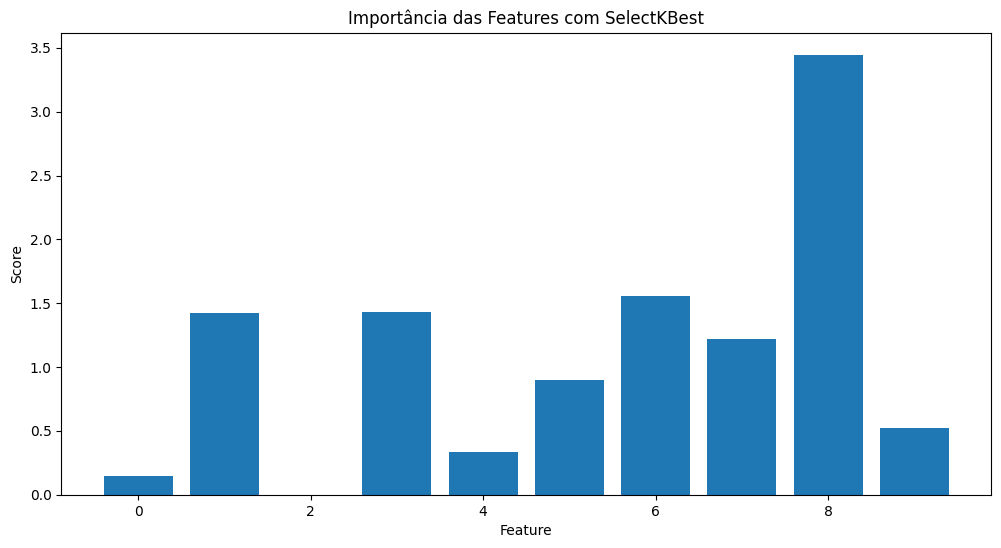

[[-1.36953232e+00  5.62477485e-02 -1.26021333e+00 -7.00543772e-01
   8.77961589e-01 -4.36405228e-01  6.69544393e-01  1.44357597e+00
  -4.43354099e-01  8.70081634e-01]
 [ 1.09330727e-02 -5.73164625e-01  5.37937450e-02 -2.71025096e-01
  -6.04569144e-01 -7.84592498e-01  1.94743766e+00 -5.15316115e-01
   3.32592052e-01  3.12642711e-01]
 [ 7.43847544e-01  5.89813160e-01 -2.19391403e-02 -7.18733173e-01
  -5.58843797e-01 -9.01000944e-01  8.94484654e-01 -9.24554875e-01
   1.12337310e-01  2.35641289e-01]
 [ 4.09864016e-01  1.24711416e+00 -3.84306954e-01  8.20005362e-01
   5.44023066e-01  6.95495527e-02  2.20923630e-01  7.13397985e-01
   9.59126100e-01 -3.99284942e-01]
 [ 4.53147372e-01  8.77864842e-01 -4.56383117e-01 -1.73707945e+00
  -7.71826306e-01  7.26912206e-03  1.07981029e+00  1.53996728e+00
   8.66742137e-01  2.39759419e-01]
 [-2.64068322e-01  9.33267923e-01 -6.22562900e-02 -9.67924901e-01
   1.19275030e+00 -8.44471234e-01 -1.02079982e+00 -1.89133651e+00
   1.96013380e+00 -3.68609810e-01

,0,1,2,3,4,5,6,7,8,9
1,-1.369532,0.056248,-1.260213,-0.700544,0.877962,-0.436405,0.669544,1.443576,-0.443354,0.870082
0,0.010933,-0.573165,0.053794,-0.271025,-0.604569,-0.784592,1.947438,-0.515316,0.332592,0.312643
0,0.743848,0.589813,-0.021939,-0.718733,-0.558844,-0.901001,0.894485,-0.924555,0.112337,0.235641
0,0.409864,1.247114,-0.384307,0.820005,0.544023,0.069550,0.220924,0.713398,0.959126,-0.399285
0,0.453147,0.877865,-0.456383,-1.737079,-0.771826,0.007269,1.079810,1.539967,0.866742,0.239759
...,...,...,...,...,...,...,...,...,...,...
1,-1.443229,-0.293696,-1.571911,-0.938037,-0.459049,1.856555,-0.191349,0.088256,-0.393689,-1.988988
0,0.541844,1.455522,-1.207041,1.467642,-0.162318,-0.333636,-0.468953,-1.168319,-0.108894,1.072999
1,0.033479,0.780148,0.327659,1.503974,-0.824088,-1.311345,-0.260642,0.994368,-0.729524,0.408294
0,1.393242,0.381508,1.410177,-0.575957,-0.971336,-0.257257,0.906679,-0.495541,-0.056670,1.855430


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)

# Gráfico
scores = selector.scores_

plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()
print(X,y)
df = pd.DataFrame(X,y)
df

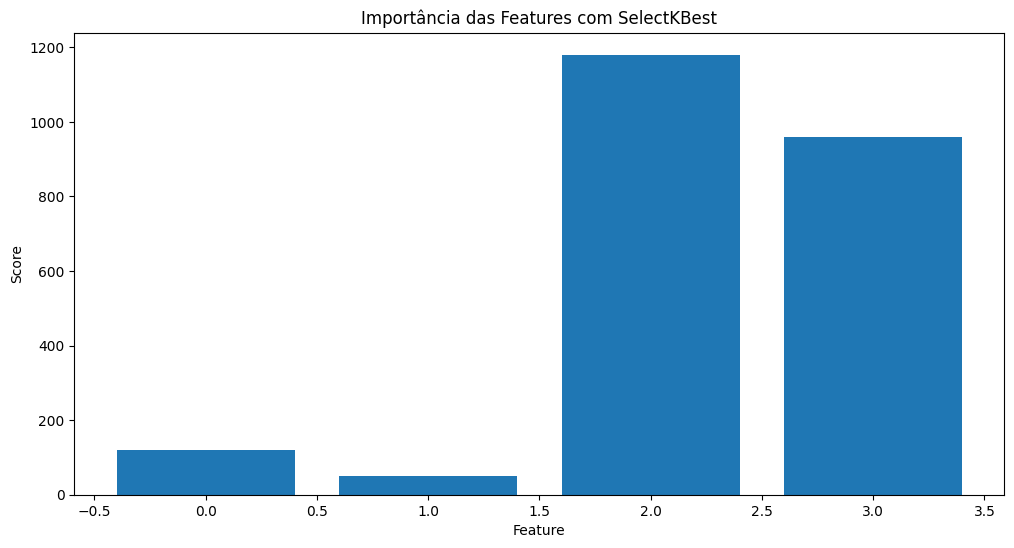

In [ ]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

# Carregar dados de exemplo
iris = load_iris()
# print(iris)

X, y = iris.data, iris.target
# print(X,"\n\n",y)
# Selecionar as 2 melhores features
selector = SelectKBest(score_func=f_classif, k=2)
X_novas = selector.fit_transform(X, y)

# print(X_novas)

# Gráfico
scores = selector.scores_

plt.figure(figsize=(12, 6))
plt.bar(range(len(scores)), scores)
plt.title('Importância das Features com SelectKBest')
plt.xlabel('Feature')
plt.ylabel('Score')
plt.show()


Exemplo de uso de correlação em Python:

In [ ]:
import pandas as pd

# Dados de exemplo
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [1, 2, 3, 4, 5]
})

# Calcular a correlação entre características e a variável de resposta
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

feature1    1.0
target      1.0
feature2   -1.0
Name: target, dtype: float64


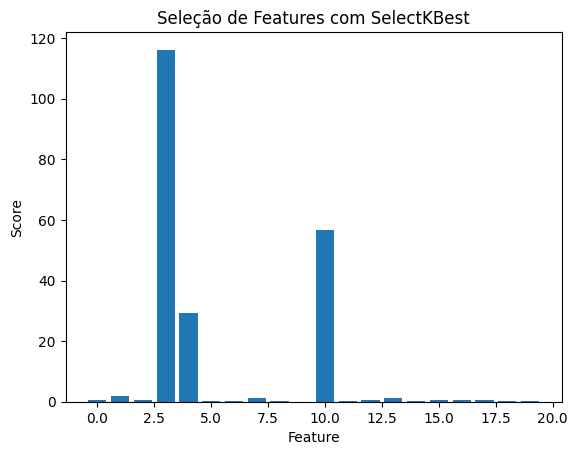

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)
# print(X,'\n\n',y)

# Selecionar as 5 melhores features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Exibir as scores das features
scores = selector.scores_
plt.bar(range(len(scores)), scores)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Seleção de Features com SelectKBest')
plt.show()

### Resultados Esperados:
O gráfico de barras mostrará as scores de cada feature, com as 5 melhores selecionadas para o modelo.


#### **Wrapper:**

#### A.10.2 Métodos Wrapper

Os métodos wrapper avaliam várias combinações de características e selecionam a combinação que resulta no melhor desempenho do modelo. 

São computacionalmente caros, mas podem ser muito eficazes. 
Um exemplo comum é a Regressão Stepwise.

2. **Wrapper**: Seleção de features usando um modelo preditivo. Exemplo com `RFE`:

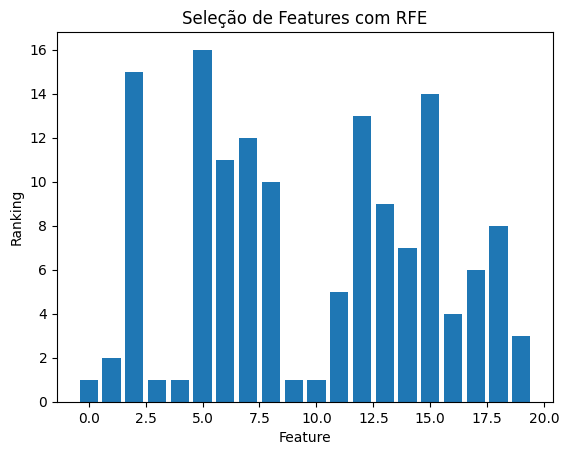

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Dados de exemplo (X: features, y: target)
X, y = make_classification(n_samples=100, n_features=20, n_informative=2, n_redundant=2, random_state=0)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=2)
selector = selector.fit(X, y)

print("Features selecionadas:", X.columns[selector.support_])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

2. **Wrapper**: Seleção de features usando um modelo preditivo. Exemplo com `RFE`:

(100, 5)


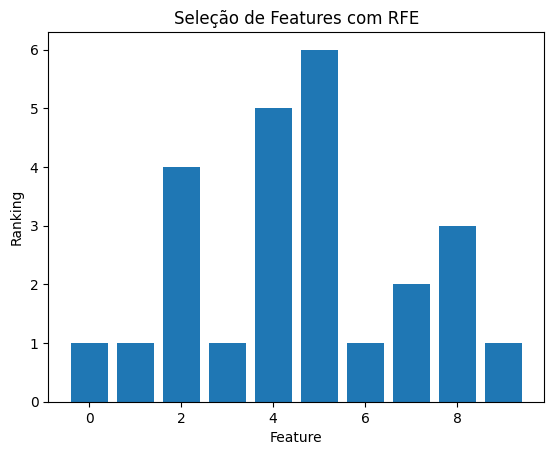

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randint(0, 2, 100)

# Aplicar RFE com Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
X_new = rfe.fit_transform(X, y)

# Features selecionadas
print(X_new.shape)


# Exibir ranking das features
ranking = rfe.ranking_
plt.bar(range(len(ranking)), ranking)
plt.xlabel('Feature')
plt.ylabel('Ranking')
plt.title('Seleção de Features com RFE')
plt.show()

Exemplo de uso de um método wrapper em Python (Sequential Feature Selector):

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
import pandas as pd

# Dados de exemplo
df = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [5, 4, 3, 2, 1],
    'target': [1, 2, 3, 4, 5]
})

# Calcular a correlação entre características e a variável de resposta
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))
# Dados de exemplo
X = df[['feature1', 'feature2']]
y = df['target']

# Modelo base
model = LinearRegression()

# Sequential Feature Selector
sfs = SequentialFeatureSelector(model, n_features_to_select=1, direction='forward')
sfs.fit(X, y)

print(sfs.get_support())  # Características selecionadas

feature1    1.0
target      1.0
feature2   -1.0
Name: target, dtype: float64
[ True False]


C:\Users\dacio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dacio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dacio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\dacio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Lo

### Métodos Embutidos

Os métodos embutidos realizam a seleção de características durante o processo de treinamento do modelo. 

Exemplos incluem Árvores de Decisão e Florestas Aleatórias, que calculam a importância das características durante o ajuste do modelo.


3. **Embedding**: Seleção de features integrada ao processo de treinamento. Exemplo com `Lasso`:

In [ ]:
from sklearn.linear_model import Lasso

# Dados de exemplo (X: features, y: target)
X = np.random.randn(100, 10)
y = np.random.randn(100)

# Aplicar Lasso para seleção de features
model = Lasso(alpha=0.1)
model.fit(X, y)

# Coeficientes do modelo
print(model.coef_)

[ 0.          0.         -0.         -0.          0.         -0.
 -0.03164095  0.         -0.          0.        ]


Exemplo de uso de uma Árvore de Decisão em Python:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Modelo de Árvore de Decisão
model = DecisionTreeRegressor()

# Ajuste do modelo
model.fit(X, y)

# Importâncias das características
importances = model.feature_importances_
print(importances)

[0.05858466 0.25684837 0.00204848 0.07578789 0.09067399 0.13079079
 0.21053433 0.03149536 0.0647085  0.07852764]


Exemplo de uso de Floresta Aleatória em Python:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)
model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

print(importances)

[0.10405693 0.10277861 0.08118616 0.10975744 0.09006217 0.11291782
 0.09762155 0.09261881 0.09658331 0.1124172 ]


**Exemplo de Embedding:**

In [ ]:
from sklearn.linear_model import Lasso
import pandas as pd
# Dados
data = {
    'Feature 1': [0.5, 0.1, 0.8, 0.4, 0.7],
    'Feature 2': [0.2, 0.4, 0.7, 0.9, 0.3],
    'Feature 3': [0.1, 0.6, 0.3, 0.5, 0.8],
    'Classe': [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Modelo
X = df[['Feature 1', 'Feature 2', 'Feature 3']]
y = df['Classe']

model = Lasso(alpha=0.1)
model.fit(X, y)

print("Coeficientes:", model.coef_)
print("Features selecionadas:", X.columns[model.coef_ != 0])

Coeficientes: [ 0. -0. -0.]
Features selecionadas: Index([], dtype='object')
